In [2]:
import json
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


pd.options.plotting.backend = "plotly"

pd.set_option('display.max_rows', None)

In [3]:
df_source = pd.read_csv("data/query_by_category.csv", delimiter = ",")
df_source.head()

platform             query                            pds_cat_id  \
0    touch        oil change  5e3979be-70e4-4e97-a028-1f764764a33c   
1    touch           massage  f0c8bbc1-baa4-4048-ace6-8bf7bf14cae5   
2    touch  great wolf lodge  23de9165-5b2b-46d2-8074-3621bc39caed   
3    touch             botox  46593102-75e9-4da6-96f8-5b5449827a5b   
4      web           massage  f0c8bbc1-baa4-4048-ace6-8bf7bf14cae5   

      cft_cat_name  imps  clicks  search_count  conversion        gp  
0       Oil Change  5168     589           992          77  970.8709  
1  Couples Massage  4967     402          1801          16  499.1053  
2      Water Parks  3916     733          1326           8  483.3520  
3            Botox  3402     460           658           8  502.2845  
4  Couples Massage  3337     100           913           2   53.2699

In [4]:
date_to_save = df_source[["cft_cat_name", "gp"]].groupby("cft_cat_name").sum().sort_values(["cft_cat_name", "gp"], ascending = True).reset_index()
#saved.head()
# Write to CSV without pandas
#output_file = 'models/category_sort.csv'
#with open(output_file, 'w', encoding='utf-8') as f:
#    f.write('text,value\n')
#    for row, data in date_to_save.iterrows():
#        #print (data.gp)
#        f.write(f'{data.cft_cat_name},{data.gp}\n')

In [5]:
df_source.query("query == 'couple massage' and conversion > 0").groupby(["cft_cat_name"]).agg({
        'query' : 'first', 'pds_cat_id' : 'first',
        'cft_cat_name' : 'first', 'imps' : 'sum', 'clicks': 'sum', 'conversion' : 'sum', 'gp': 'sum'}).sort_values(['gp'], ascending = False)

query                            pds_cat_id  \
cft_cat_name                                                            
Couples Massage  couple massage  f0c8bbc1-baa4-4048-ace6-8bf7bf14cae5   

                    cft_cat_name  imps  clicks  conversion       gp  
cft_cat_name                                                         
Couples Massage  Couples Massage  1451     121           3  94.1285

In [6]:
df = df_source[["imps", "conversion", "clicks", "gp", "cft_cat_name"]].query("clicks > 0").groupby(["cft_cat_name"]).agg({
    "clicks" : "sum", "cft_cat_name" : "first", "conversion" : "sum", "imps" : "sum", "gp" : "sum"}
)[["imps", "conversion", "clicks", "gp"]].reset_index().sort_values("gp", ascending = False)
df["ctr"] = df["clicks"] / df["imps"]
df["cvr"] = df["conversion"] / df["clicks"]
df.head()

cft_cat_name   imps  conversion  clicks         gp       ctr  \
477     Laser Hair Removal   7107          38     847  3509.4022  0.119178   
206        Couples Massage  21941          61    1774  2499.2164  0.080853   
303                 Facial  23955          63    1899  2420.9111  0.079274   
563             Oil Change  13390         179    1291  2347.3227  0.096415   
441  Injectables & Fillers   6306          18     854  1623.4938  0.135427   

          cvr  
477  0.044864  
206  0.034386  
303  0.033175  
563  0.138652  
441  0.021077

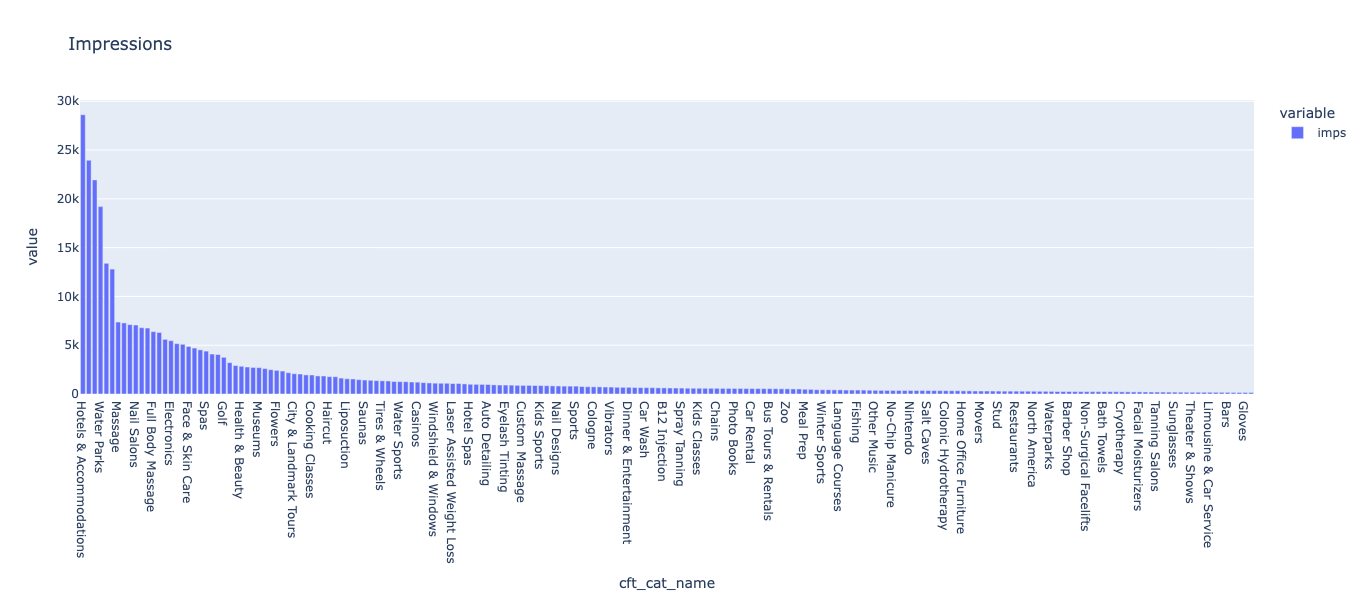

In [8]:
df1 = df.reset_index().set_index(["cft_cat_name"])
df1 = df1.sort_values(by='imps', ascending=False).head(200)
df1["imps"].plot.bar(width=1200, height=600, title = "Impressions")

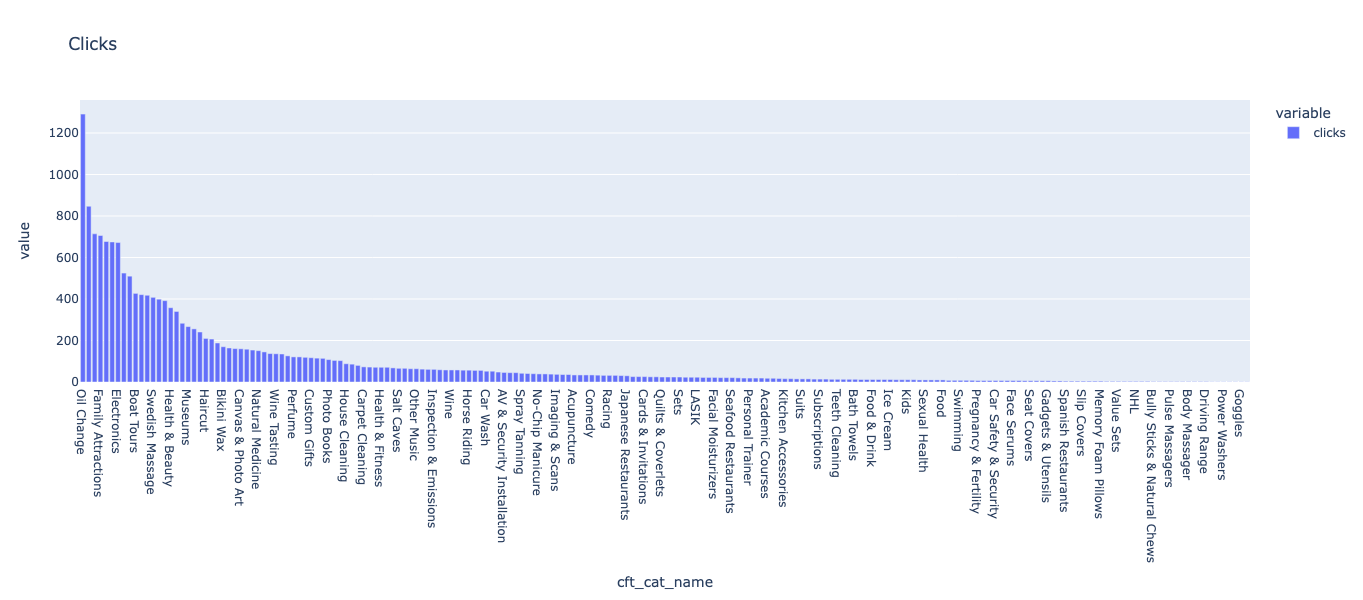

In [14]:
df1 = df1.sort_values(by='clicks', ascending=False).head(200)
df1["clicks"].plot.bar(width=1200, height=600, title = "Clicks")

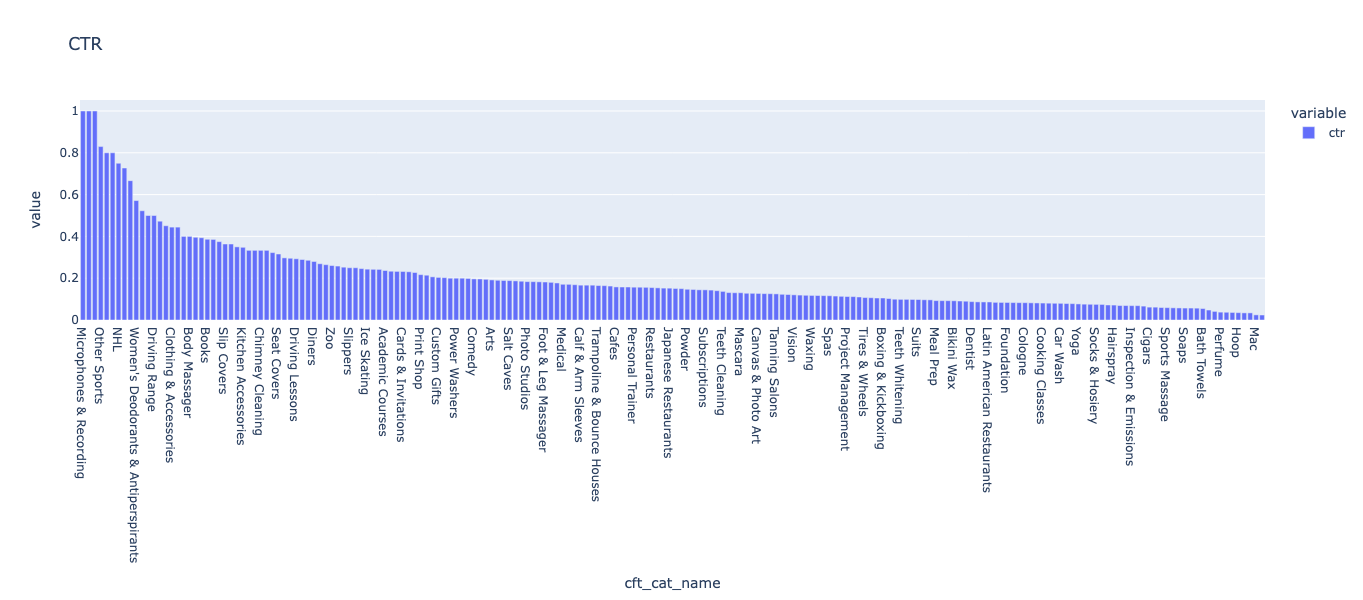

In [15]:
df1 = df1.sort_values(by='ctr', ascending=False).head(200)
df1["ctr"].plot.bar(width=1200, height=600, title = "CTR")

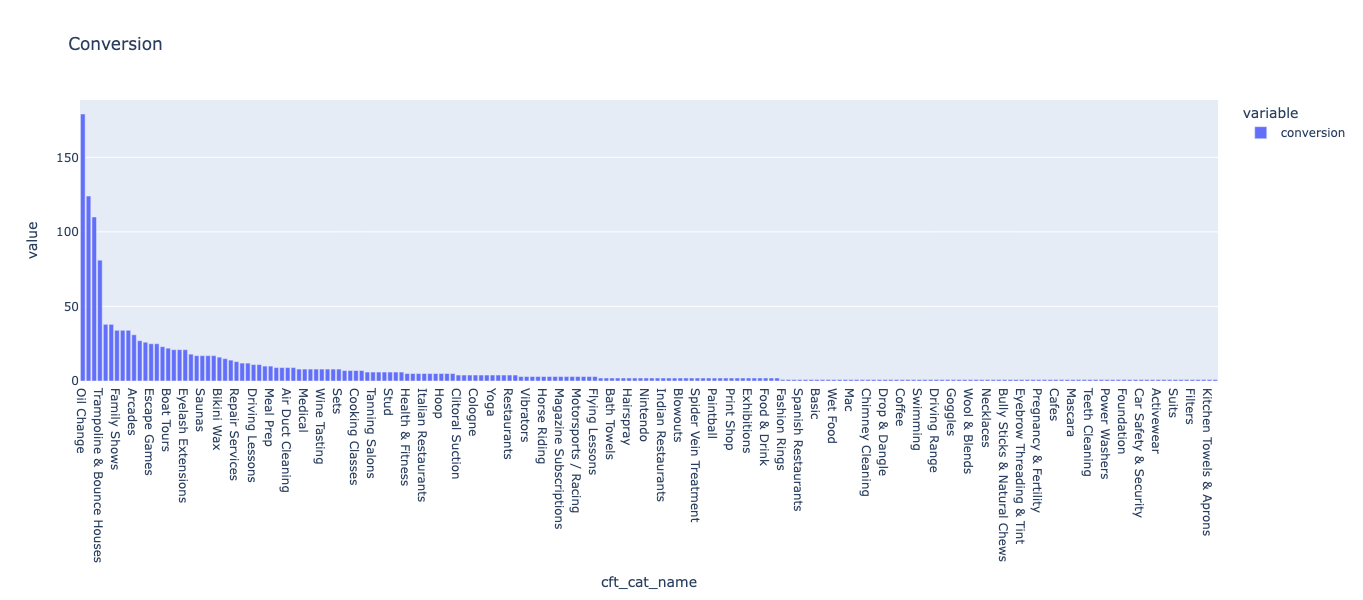

In [16]:
df1 = df1.sort_values(by='conversion', ascending=False).head(200)
df1["conversion"].plot.bar(width=1200, height=600, title = "Conversion")

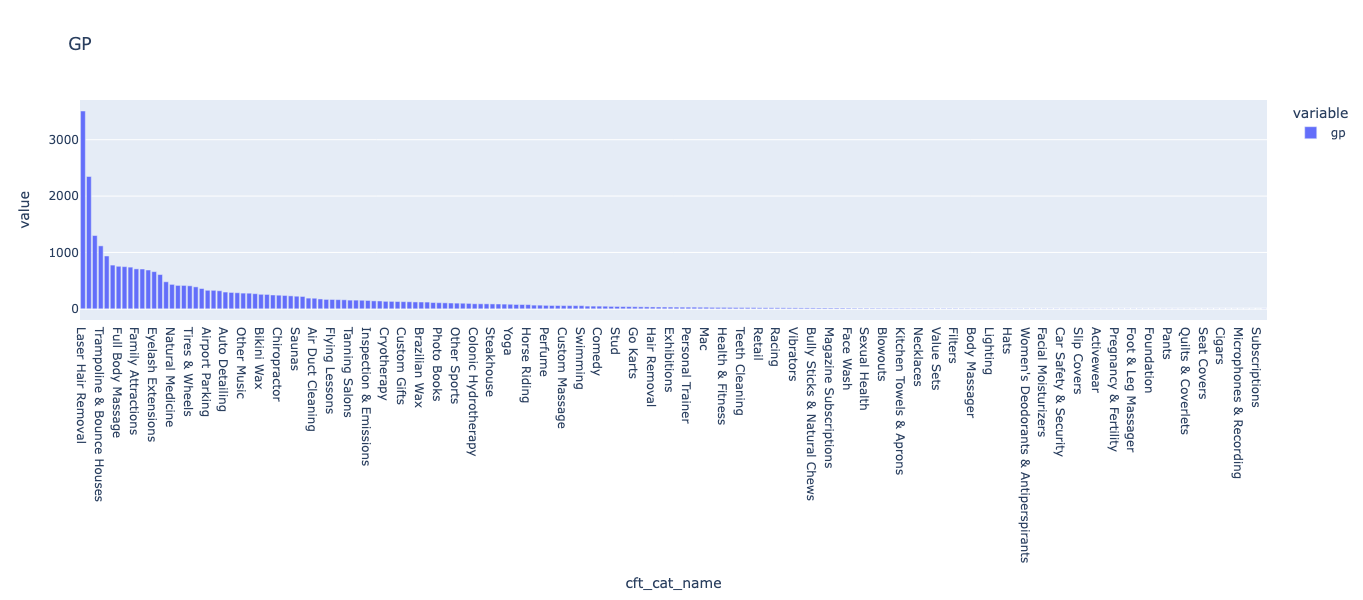

In [17]:
df1 = df1.sort_values(by='gp', ascending=False).head(200)
df1["gp"].plot.bar(width=1200, height=600, title = "GP")

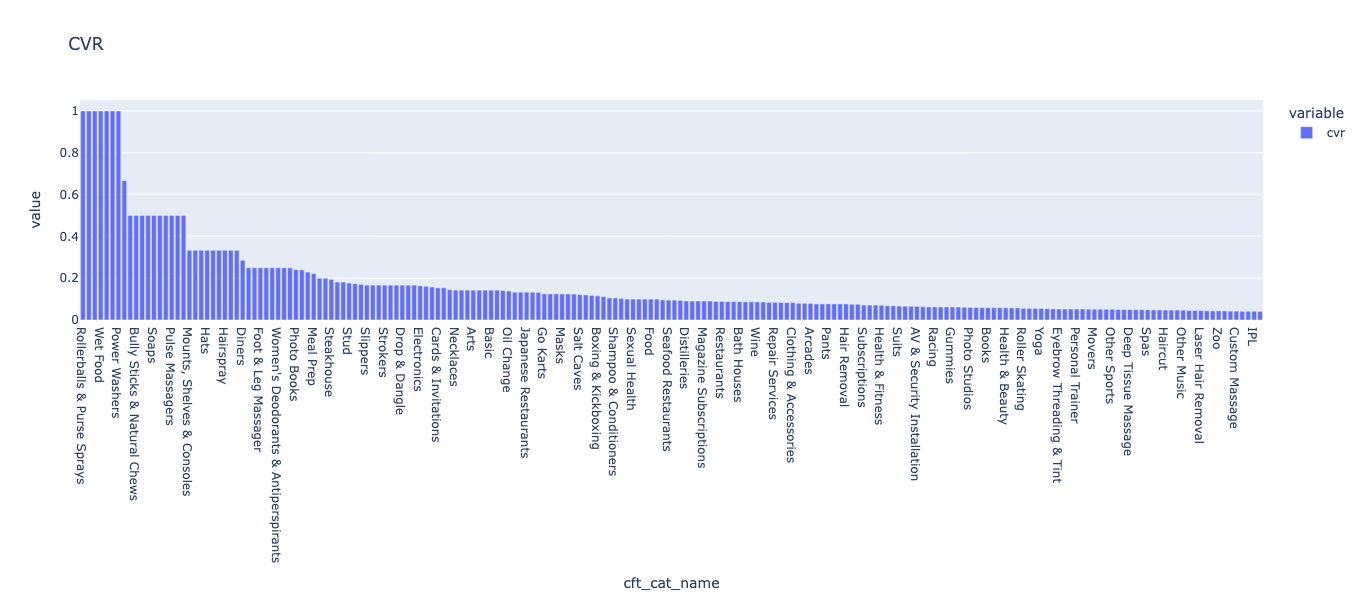

In [18]:
df1 = df1.sort_values(by='cvr', ascending=False).head(200)
df1["cvr"].plot.bar(width=1200, height=600, title = "CVR")

In [19]:
correlation_matrix = df[["imps", "conversion", "clicks", "ctr", "cvr", "gp"]].corr()

# Zobrazení korelační matice
print(correlation_matrix)

                imps  conversion    clicks       ctr       cvr        gp
imps        1.000000    0.557998  0.935790 -0.175147  0.008854  0.710301
conversion  0.557998    1.000000  0.695704 -0.141776  0.112768  0.732196
clicks      0.935790    0.695704  1.000000 -0.183684  0.020077  0.817892
ctr        -0.175147   -0.141776 -0.183684  1.000000 -0.091512 -0.154863
cvr         0.008854    0.112768  0.020077 -0.091512  1.000000  0.049848
gp          0.710301    0.732196  0.817892 -0.154863  0.049848  1.000000


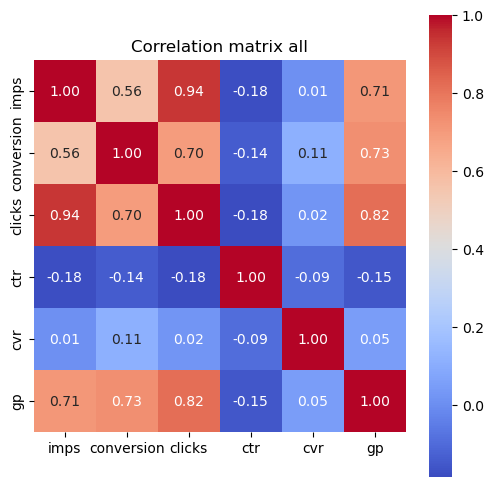

In [20]:
# Vytvoření tepelné mapy korelační matice
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix all')
plt.show()

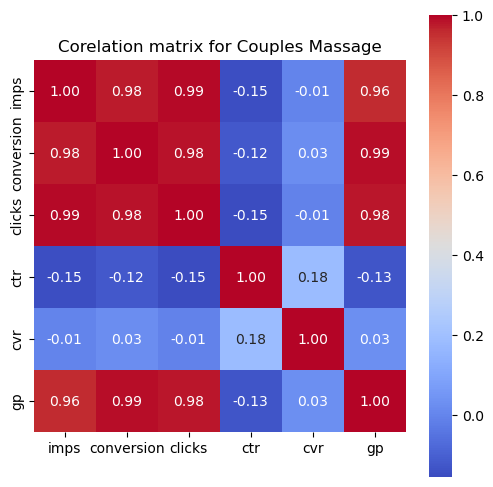

['massage', 'couples massage', 'spa', 'couples message', 'couple massage', 'couples', 'dyer in', 'massages', '224 massage', 'couples massage near me', 'massage and spa couples', 'mess', 'love institute', 'massage for 2', 'essentials', 'whitman soa', 'sakura', 'plainview massage', 'philadelphia', 'massages in renton wa', 'massages for couples', 'massage.', 'massage, single person, near 43228', "massage valentine's day", 'massage spa', 'massage couples', 'massage couple', 'massage chicago couples', 'massage bound brook nj', 'massa', 'masages', 'masage', 'masaage', 'massage sauna', 'massage reflexology', 'massage places', 'massage parlor', 'massage on main', 'massage on 95th oaklawn', 'massage nashville', 'massage green spa', 'massage for two', 'message couple deal', 'little red day spa', 'magnificent mile', 'lush', 'lymphatic massage for couples', 'towngate massage', 'two person massage', 'two hour massage', 'sunshine therapy spa', 'swedish', 'the couple spa', 'thai spa', 'thai massages'

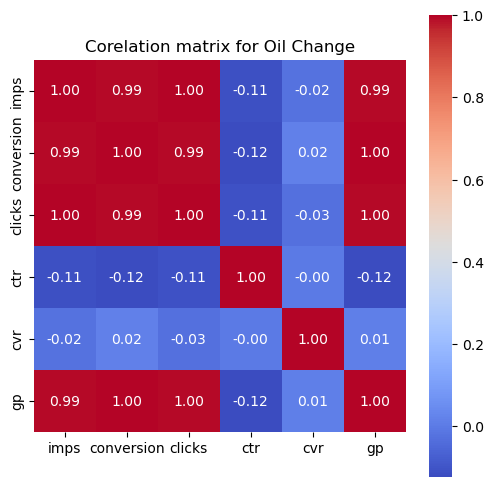

['oil change', 'oil', 'valvoline', 'full synthetic oil change', 'synthetic oil change', 'jiffy lube', 'oil changes', 'oil chnage', 'synthetic oil', 'vavoline', 'jiff', 'experience top notch oil change', 'jiffy lube full synthetic blend oil change', 'calabasas car care', 'kwik kar', 'midas', 'oil springfield massachusetts', 'synthetic oil change kwik kar', 'transmission oil change', 'tire rotation', 'oil change in glastonbury, ct', 'valvoline hamilton', 'take 5 oil', 'valvoline oil change glastonbury', 'valvoline west springfield', 'oil change wallingford', 'oil filter change', 'mountainview tires', 'meinike', 'jiffy lube florida', 'oil  change', 'oil change durham', 'mr tire', 'oil xhange', 'oil chnage deals', 'oil chsnge', 'oil discounts near me', 'oil dorms', 'oilchange', 'oil changw', 'oil change coupons', 'oil change conventional', 'oil chan', 'oil chabnge', 'oil cha', 'oil and filter change', 'oil changsss', 'oil change fully synthetic', 'oil change in newark delaware', 'oil chang

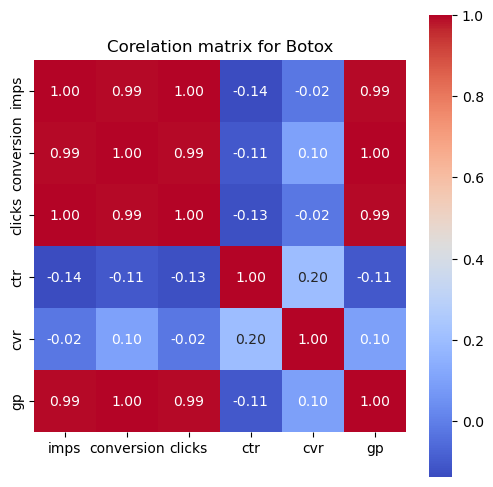

['botox', 'notox', 'botox fort worth', 'botox inua', 'scottsdale sculpt', 'pines', 'promd tox bar', 'promd', 'peach', 'masseter botox', 'masseter', 'lip injections', 'lip filler botox', 'liquivida wellness center', 'lighttouch', 'marionette lines', 'miriam', 'tox', 'tmj botox', 'wigwam spa', 'youthful medical spa', 'wrinkles', 'vishka skin care', 'selfie', 'skin perfect brothers', 'bulk botox', 'da vinci', 'as botox', '40 units of botox', 'body factory', 'borox', 'bolbella', 'botox 40 units', 'botox 60', 'botox underarm', 'botxos', 'botx', 'botox specials', 'botox near me', 'botox lift', 'botox jaw pain', 'botox injections', 'botox in tarzana', 'botox in orange ca', 'botox filler', 'botox brow lift', 'botox allen clinic', 'botox acne', 'boʻtox', 'baby botox', 'beverly hills rejuvenation center', 'ideal imagine botox', 'icon md', 'hotox', 'lavande spa', 'juvaderm ultra', 'juvederm under eyes', 'juvederm volbella', 'juvederm vol', 'keryflex', 'facial botox near', 'eye botox', 'faulkner',

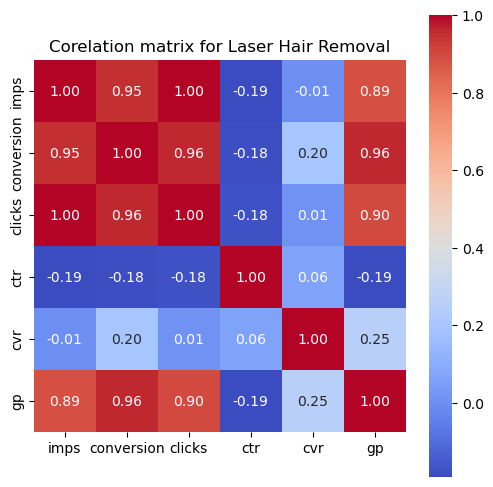

['laser hair removal', 'laser', 'laser hair-removal', 'lazer hair removal', 'sev laser', 'sev', 'yag laser', 'proskin', 'montclair rejuvenation', 'full body laser', 'laser hair', 'simplicity laser', 'laser hair removwl', 'hair laser', 'full leg laser', 'laser hair remobal', 'sec laser calabasas', 'painless lazer', 'prolase', 'precise medical', 'permanent laser hair removal', 'lser hair removal', 'love you laser', 'lotus health', 'luz lounge', 'láser', 'top aesthetics unlimited', 'top aesthetic laser', 'underarm hair removal', 'unlimited laser hair', 'unlimited laser hair removsl', 'unlimited', 'unique laser', 'tribella laser', 'turlock, ca', 'sun and shade spa oa', 'sedo', 'rejuv', 'removal remove red blood vessels: all kinds of telangiectasia, cherry hemangioma and more.', 'spa 7', 'spider vein removal', 'simplicity', 'sev calabasas', 'semper', 'skyn', 'skinstation laser', 'skinny spa', 'skin bleaching and laser hair removal', 'skin city lab', 'skinlicious', 'skinagency', 'candela', '

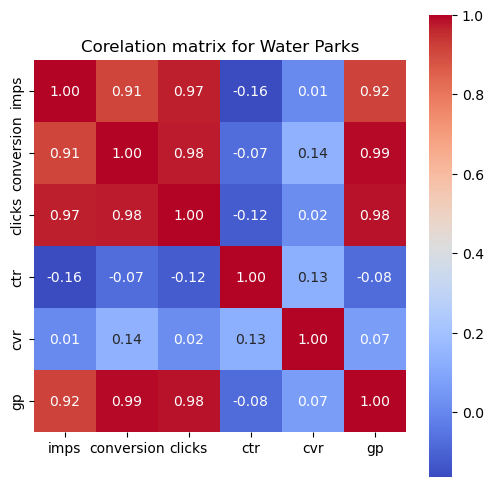

['great wolf lodge', 'legoland', 'great wolf', 'universal', 'restouran with kids', 'castaway bay', 'great wolf lodge day pass', 'lego atlanta', 'water', 'outdoor water park', 'orlando hotel', 'orlando fl', 'pocono’s', 'pocono resorts', 'meow wolf', 'michigan', 'menasha wi great wolf lo', 'legoland hot', 'legoland florida', 'legoland california', 'lego land resort', 'neeneh wi', 'nova adventure park', 'mirror maze orlando', 'moody gardens attractions', 'mountains', 'univeral studios', 'urban air adventure park', 'tannersville, pa', 'theme park', 'things for kids', 'the great wolf', 'the grand resort', 'wolf lodge', 'wolf', 'wisconsin dells single day passes', 'wi dells', 'williamburg', 'wilderness wisconsin dells', 'wilderness in the smokies', 'wilderness hotel', 'wilderness', 'virginia aquarium', 'valentine getaway', 'waterpatk', 'waterparks', 'waterpark pennsylvania', 'waterpark near ny', 'waterpark', 'water parks indoor', 'water parks', 'water park passes', 'water park new', 'water p

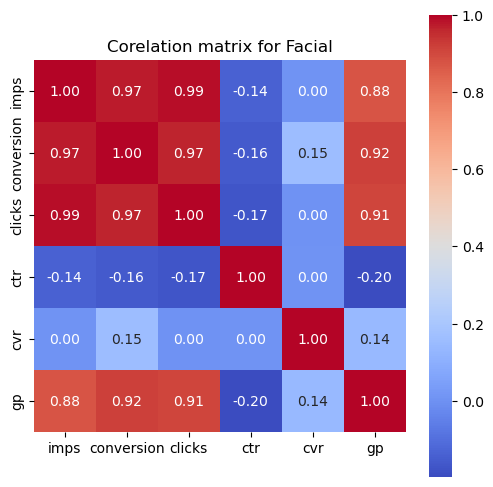

['facial', 'ultherapy', 'ipl', 'prp', 'hydrafacial', 'microdermabrasion', 'back facials', 'facials', 'hifu', 'face', 'chemical peel', 'bbl', 'chemical peel vi', 'acne facial', 'hydrating facials', 'gmg', 'naz', 'hydrafacials', 'paul mitchell', 'skin spa', 'collagen facial', 'facial with extractions', 'facial and massage', 'dermaplanning', 'skincare by melissa', 'ipanema', 'elevate salon', 'stone crop', 'oxygen facial', 'organic facial', 'plasma pen treatment', 'plasma facial', 'picosure', 'pico', 'phpto facial', 'profractional therapy', 'prp face', 'prosculpt medspa', 'pro facial', 'potomac medical aesthetics', 'pore', 'premiere', 'pari’s medspa', 'peel', 'peels', 'photfacial', 'photofacial', 'perfect peel', 'perfect derma peel', 'massage zurich', 'mcironeedling prp', 'massage and facial', 'massage facial', 'med spa', 'mephis', 'men’s facial', 'metairie, la botox', 'medspa', 'memphis aesthetics', 'lipl laser favialaser facial', 'lifty facial', 'lymphatic facial', 'new garden spa', 'nev

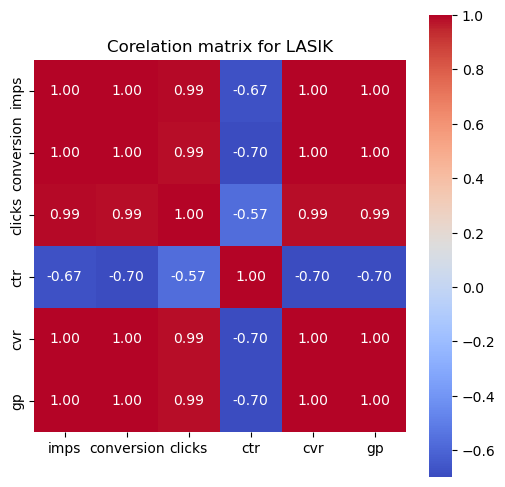

['lasik', 'lasik chicago', 'laser vein removal']


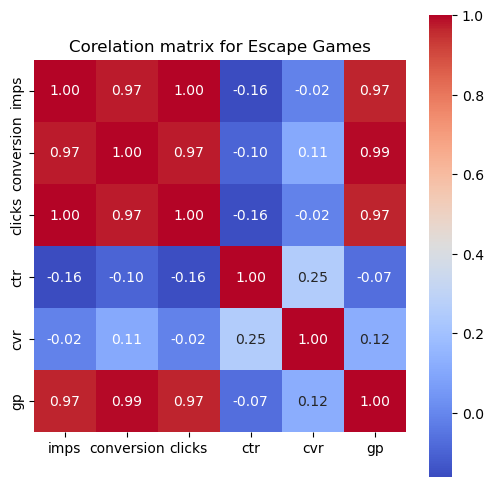

['escape room', 'mishmash', 'escape', 'escape rooms', 'missing piece eacape room', 'escape game', 'escape room gatlinburg', 'xscape room', 'paint  room', 'paint fight', 'panic escape room', 'mystic escape room', 'mystery rooms', 'odyssey', 'tyhe escape game', 'the great escape', 'the escape room moa', 'the escape room', 'the escape game grapevine', 'the escape game', 'venetian', 'saw escape room', 'scape room', 'rage room', 'rage', 'red giant', 'squid games', 'smash room', 'castle skateland', 'cville escape room', 'amazing escape room', '13th hour escape', 'in=mmersive escape', 'it escape', 'eacape room', 'escspe room', 'escapology', 'escaperoom', 'escapeology', 'escape roóm', 'escape rooms mn', 'escape room party', 'escape room mongeryville', 'escape room irvine', 'escape room for kids', 'escape room for 2', 'escape room austin', 'escape room anthem az', 'escape room 4', 'escape rook', 'escape it', 'escape game sawgrass', 'escape game chicago', 'esc', 'great room escape', 'great escap

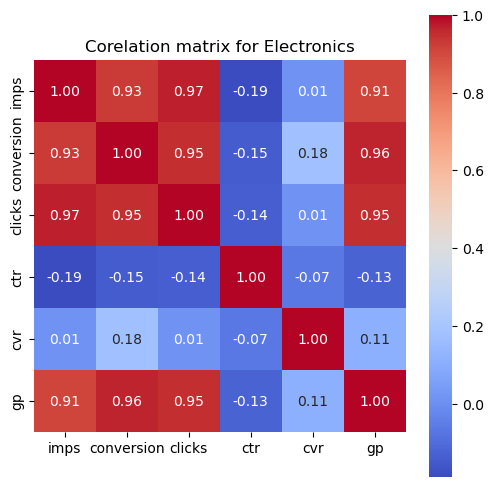

['microsoft office', 'microsoft', 'windows 11', 'office', 'office 2024', 'office 365', 'office 2024 professional plus', 'windows 10', 'office 2021', 'microsft', 'mcafee', 'microsoft office for mac', 'microsoft office 2021', 'word', 'office for mac', 'ms office', 'microsoft\\', 'windows 10 pro', 'microsoft 365', 'm365', 'office mac', 'windows 11 pro', 'windows 11 home', 'shredding', 'microsoft  office business', '2010 microsoft', 'microsoft office professional 2021', 'microsoft project', 'microsoft professional 2021', 'microsoft 2019', 'microsoft office 365 personal', 'window 11 pro', 'windows 10 key', 'microsoft businesss', 'office professional plus for windows', 'off', 'windows', 'microsoft 11', 'windows key', 'microsoft key', 'product key windows 11', 'office365', 'office tom', 'pmp', 'product key for windows 11', 'pc gamer', 'office professional 2024', 'office professional', 'micosoft 365 personal', 'mico', 'lifetime', 'license tom', 'office home and student 2021', 'office home and 

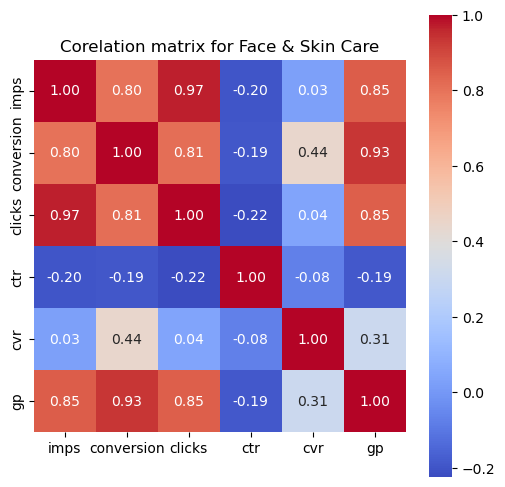

['microneedling', 'morpheus8', 'fraxel', 'fractional laser', 'pico laser', 'dermaplaning', 'dermablading', 'dark spots hands', 'pixel laser', 'pixel', 'pitted scars', 'prf treatment', 'prf', 'potenza', 'pores', "men's face laser treatment", 'melasma laser toning', 'láser treatment', 'neck treatment', 'nctf 135', 'micro', 'nucell skin me', 'midtown laser spa', 'mironeedling', 'micro needling albany ny', 'micro needling', 'micro needle', 'micro dermabrasion', 'micronedling', 'microneedlong', 'microneedlings', 'microneedling rf', 'microneedling prp', 'microneedle', 'my sunshine beauty', 'morpheus', 'morphe', 'tixel', 'underarm pigmentation', 'under eye treatment', 'undereye', 'tca cross acne treatment', 'xanadu', 'v beam', 'vitruvian beauty lounge.', 'scottsdalesculpt', 'santa ana zoo', 'scars', 'scarlett rf', 'scar laser', 'scar', 'radiofrequency', 'radiofrequency microneedling', 'prp microneedling', 'prp microneedle', 'prp micro', 'rf and micronedling', 'resurfacing', 'rf microneedling'

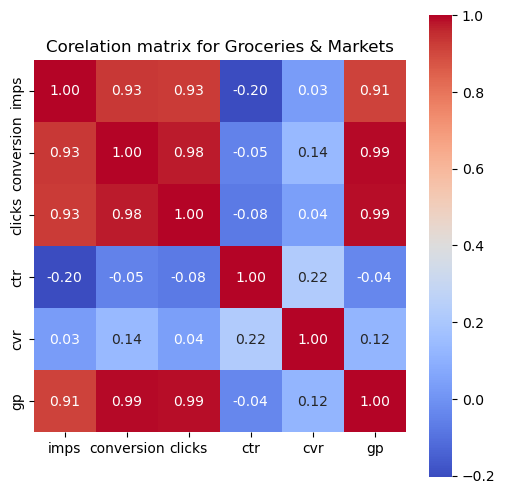

['costco', 'sams club', 'sams', 'bjs', 'bj', 'sam’s club', "sam's club", "bj's", 'cosco', 'cowtci', 'easy renewal', 'sam’s', 'sams membership', 'grocery', "sam's club card", 'costco membership', 'sam club mem', 'one-year costco membership with a $20 or $40 digital costco shop card', 'princeton athletic club', 'lobster restaurant', 'website', 'sams club membership renewal', 'sams club membership', "sam's membership", "sam's club ocala fl", "sam's c", "sam's", 'sam club', 'sams wholesale', 'sam’s membership', 'sam’s club plus', 'seaford', 'seafood', 'sms club membrship plus', 'cbd vape', 'clickup website', 'butcher', 'costos membership', 'costco deal', 'costco canada', 'costci', 'costc', 'cost', 'crab legs', 'crab', '15 dollar membership bj', 'blue crabs', 'bj’s maryville tn', 'bj’s', 'bjs membership', 'hulu', 'harbour house', 'homestead seafood festival', 'jonesboro', 'family membership', 'food williamsburg', 'gift cards']


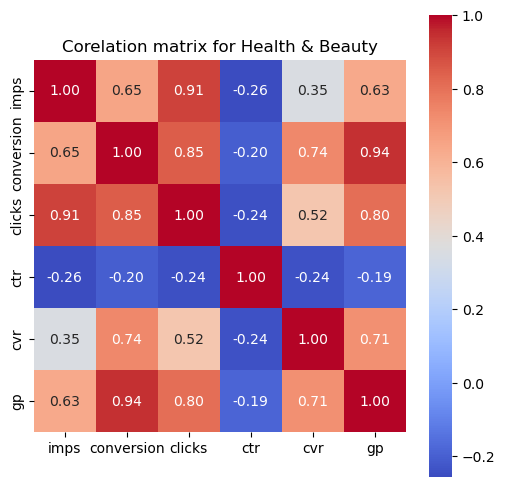

['semiglutide', 'semaglutide', 'weight loss', 'tirzepatide', 'ozempic', 'phentermine', 'weightloss', 'oze', 'oral semaglutide', 'options medical weight loss', 'phetmine weight lose', 'message', 'lipo c b12', 'nphentermune', 'monjauro', 'tirz', 'tir', 'tirzepatide coral gables', 'tirzepatide california', 'tirzepetide', 'tirzepitide', 'ultherapy nc', 'trizepatide', 'teeth aligners', 'terz', 'wrestlemania', 'vision works', 'weight shots', 'weight loss shots', 'weight loss medication', 'weight loss drugs', 'weight loss clinic', 'weight lodd', 'weight care', 'weight', 'weigh loss', 'success by design', 'sigmaglutide', 'semliglutide', 'semiglutide b12', 'semaglutide pills', 'semaglitide', 'sema', 'sem', 'cbd guumm', 'doctor', 'cosmetic medicine of coral gables', 'cosmeticrx', 'a and a', 'bmimd', 'balance life', 'invigor medical', 'health', 'eyeglasses', 'fitness', 'glp1', 'glp-1', 'glp', 'gentle fitness', 'fustorix.com']


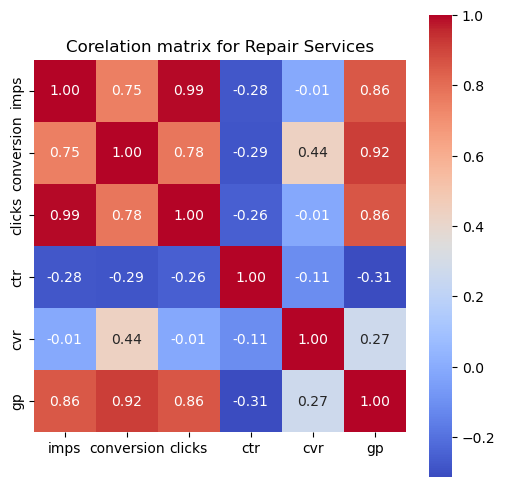

['brakes', 'brake', 'brake pads and rotors', 'break pads', 'brake pads', 'car battery', 'coolant', 'oil change package', 'mvr autorepaur', 'transmission', 'tune ups', 'rear brakes', 'repair', 'spark plugs', 'state inspection', 'ceramic pads', 'car breaks', 'car brake pads', 'car body shop repair', 'car air conditioning  check', 'car paint', 'car repair', 'automotive', 'auto zone', 'auto mall smog', 'brakes and pads', 'brake service', 'brake rotor', 'brake repaiar', 'brake pads rotors replacement', 'brake pad replacement', 'brake pad and rotors', 'brake pad', 'brake flush', 'brake fluid', 'breaks', 'break pad replacement', 'break', 'grand prairie', 'fuel induction service', 'german mechanic', 'galicia a', 'radiation flush coolant']


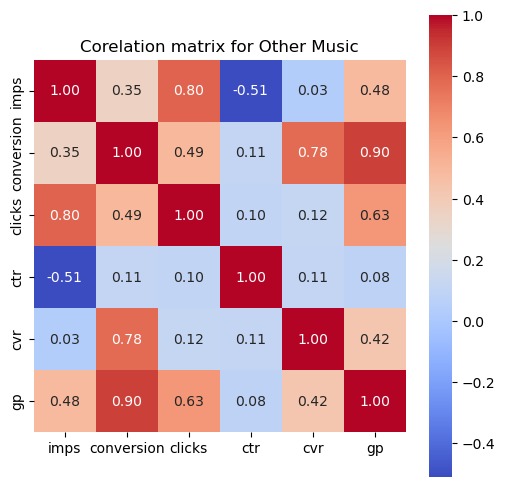

['reggae love fest', 'dru hill', 'old school concert', 'omarion', 'melanial tour boosie', 'millennium tour fort worth', 'millenium tour', 'trey songz', 'the millennium tour', 'the millennial tour', 'temptations', 'chicago bulls tickets', 'clubs', 'candle concert', 'adult', 'black eyed peas', 'hip hop', 'kinito', 'fantasia']


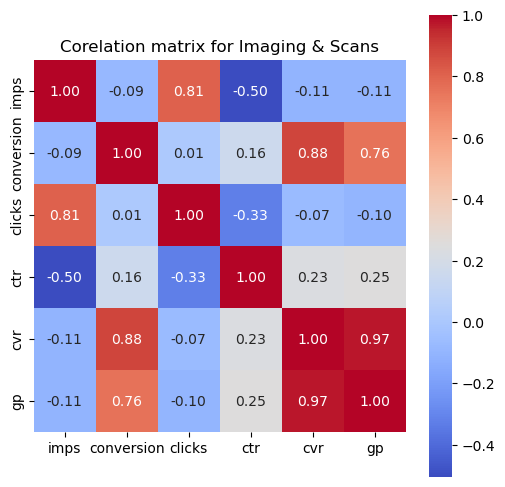

['the natural place broofield, colorado', 'dexa scan', 'pregnancy', 'miracle in progress', 'mri', 'ultrasound', 'virtual imaging', 'sneak a peak', 'cat scan', 'dexa', 'dexafit', '4d', '3d ultrrasound', '3d ultrasound', 'body scan', 'body fat scan', 'body composition', 'gender reveal', 'glow and grow baby pictures']


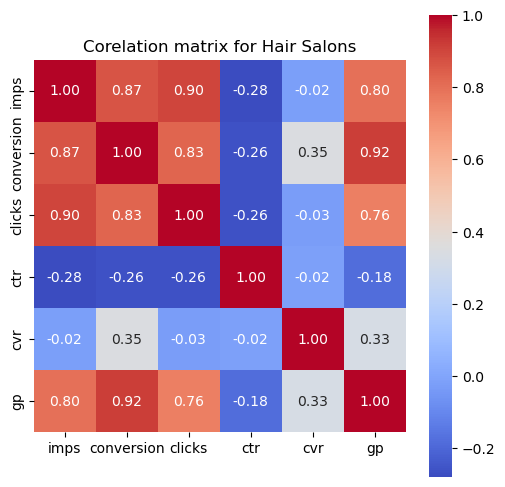

['head spa', 'we scalp care', 'hair', 'highlights', 'shortstack stylist', 'head massage bensalem pa', 'spa hair', 'beauty secret spa', 'scalp massage', 'hair salon', 'hair cut', 'scalp', 'root touch-ups', 'hair color', 'hair salons', 'salon deals', 'braids', 'ombre hair', 'organic hair color', 'plano head spa', 'pompano beach hair blowout', 'partial highlights', 'partial high lights with haircut and blow', 'partial', 'perm', 'mens hair coloring', 'medium knotless', 'medieval times arundel mills', 'lowlights', 'louisville orchestra', 'nd yag', 'microlinks', 'money piece highlight', 'touyuantang', 'updo hair', 'tape in', 'the salon', 'the face and body', 'women’s hair cut', "women's haircut", 'women hair', 'woodlands', 'v light hair extensions kit', 'wash cut blowjob', 'salon nv', 'salon hair color and cut', 'salon divine', 'salon', 'rosewood spa', 'root touchup', 'root touch up', 'santina', 'scalp treatment', 'scalp spa', 'scalp oil', 'scalp care', 'scalp and head massage', 'quincy high

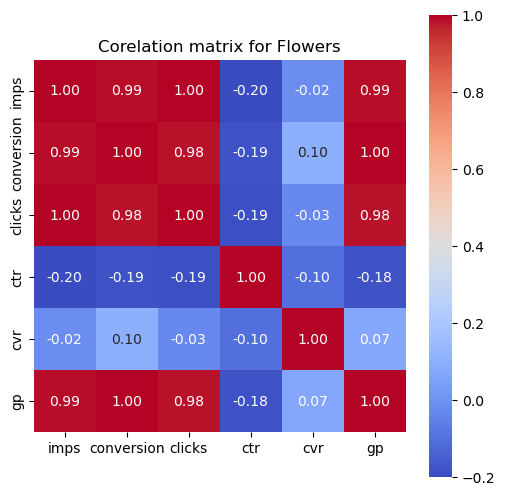

['flowers', 'rose farmers', '1800 flowers', 'fresh flowers delivery', 'atlanta flowers', '1-800 flowers', 'teleflora', 'flower delivery', 'flowera', 'fliwers', 'opi', 'pink roses', 'proglowers', 'telaflora', 'valentine’s day roses', 'valentines day', 'same day flowers', 'same day delivery flowers', 'roses', 'rose', 'red roses', 'chocolates', '36 garnet roses', 'blooms today', 'blooms', 'blue flowers', 'blue roses', 'bouquet', 'birthday flowers', 'birthday arrangement', 'flowers.com', 'flowers delivery', 'flowers and gifts', 'flower subscriptions', 'flower', 'florists.com', 'florists', 'florist', 'floral delivery', 'flwers', 'glwers', 'funeral flowet']


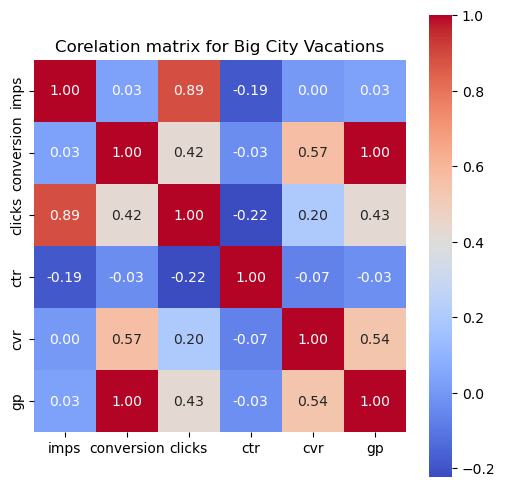

['king spa', 'ho', 'pod', 'paramount hotel nyc', 'mgm grand', 'lodging las vegas', 'linq hitel', 'linq', 'los angeles', 'marriott', 'newport, ri', 'new york city', 'new york broadway', 'new york', 'nyc hotel', 'nyc hotels', 'ocean inn villa', 'ocean city hotel in maryland', 'north myrtle beach hotel', 'north beach plantation', 'midtown hotels nyc', 'mt. fuji, 296 ny-17, hillburn, ny 10931', 'museum of', 'tournament of kings', 'time square hotel', 'time square', 'tarten room', 'the strat', 'what do you have vegas', 'westgate las vegas resort', 'vegas hotel', 'vegas flights', 'vegas deals', 'vegas', 'vagas', 'valentines day vegas', 'weekend getaway', 'warwick dallas', 'san francisco hotel', 'san antonio spus', 'san antonio river walk texas', 'san antonio river walk', 'rooms with a view', 'rooms on fremont street vegas', 'riverwalk hotel', 'rehoboth beach', 'spa hotel', 'strip', 'strat', 'chicago marriott downtown magnificent mile', 'chicago hotels', 'chicago', 'anaheim', 'atlantic', '5 s

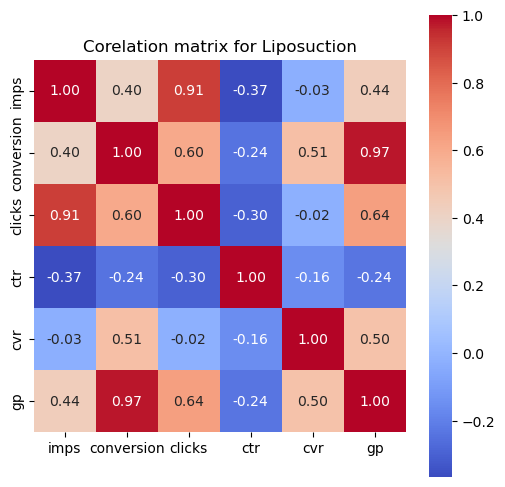

['laser lipo', 'laserlipo', 'cool sculpt', 'medi laser spa', 'lipo', 'liposuction', 'lipochin', 'lipo lounge', 'lipo light', 'light rx', 'non invasive laser lipo', 'non invasive bbl', 'mini neck lift', 'sense of skin', 'senseofskin', 'smart lipo', 'skin so sweet', 'cavitation rf', 'diamond dermis', 'cool sculpting elite', 'crypto sculpt', 'arm sculpting', 'arm lipo', 'arm', 'body sculting', 'body sculpt', 'body sculp', 'body', 'belly fat removal', 'belly fat', 'laser fat lipo', 'laser therapy', 'laser liposuction', 'laser lipo and wood therapy', 'east hill laser', 'experience velashape cellulite reduction at healthkey medspa clubs with sessions up to 52% off for smoother, firmer skin.', 'endo lift']


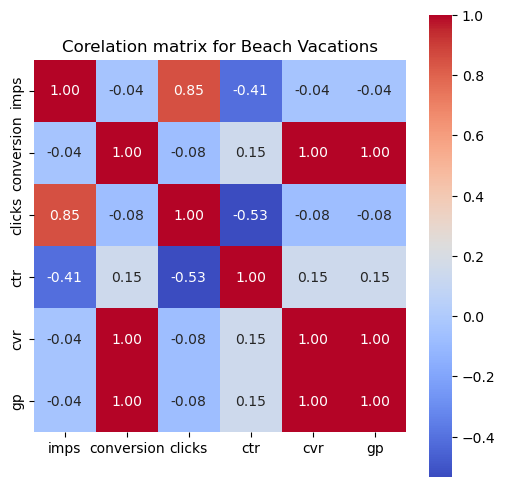

['puerto roco', 'package trips', 'oregon coast', 'pismo', "pedro's tacos", 'parking lax', 'mexico resort', 'mexico', 'lincon city', 'lifestyle resort', 'life style resort dominican republic', 'marathon fl', 'los cabos mexico', 'myrtle beach hotesl', 'myrtle beach horse', 'monterey, ca', 'travel air inclsive', 'trips to puerto rico', 'trip boston', 'tulum', 'vacation packages', 'weekend getaway puerto rico', 'waikiki', 'san diego ca', 'san juan spring break', 'puntacana', 'puertorico', 'puerto rico resorts', 'resorts in mexico', 'south beach miami hotels', 'cabo wabo', 'cabo resort', 'cabo grand solmar', 'cabo', 'cambria', 'canon beach hotels', 'car rental in puerto rico', 'date night', 'all inclusive vacation', 'all inclusive san juan', 'all inclusive resorts', 'all inclusive plus flight', 'all inclusive in puetro rico', 'all inclusive in puerto rico', 'all inclusive for 3', 'all incllusive', 'airfare all inclusive', 'airplain and hotel packages puerto rico', 'hotel cancun', 'hotel sta

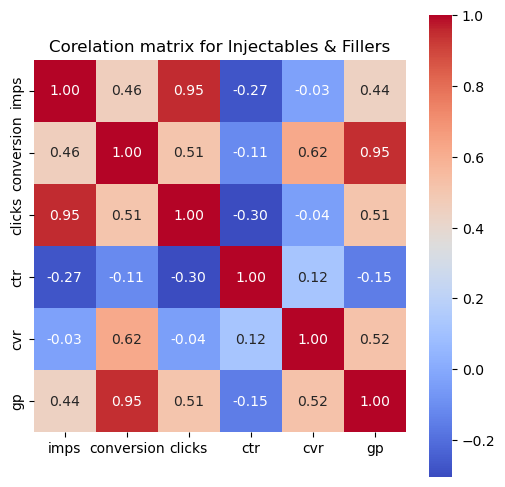

['dysport', 'lip fillers', 'lip', '40 units botox', 'bunny lines and crows feet', 'lip filler', 'restylane', 'daxxify', 'ponte vedra vein institute', 'hyloronic filler', 'plaza health and wellness', 'juvederm', 'jack and jill', 'nucell', 'filler', 'aesthetic heath and wellness', 'p shot', 'oxygen chamber', 'plasma fibroblast', 'prima med spa', 'prf injections', 'prof injections', 'mens enhancement', 'medical vitality', 'liquivida', 'lip injection', 'lip injec', 'lip flip', 'lip filltr', 'lip enhancement', 'lime aesthetics', 'life alert', 'marbella medical  40 units of xeomin', 'neuvaderm', 'nasolabia filler', 'non surgical butt radiesse', 'microbrasion', 'total med solution', 'under eye filler', 'under eye botox', 'undereye filler', 'ultra', 'tear trough', 'tarzana botox', 'the natural place', 'the injector lab med spa', 'the injector lab', 'wild and beautiful', 'xeomin', 'zbeaute', 'wrinkle', 'wellness med art', 'volume xc', 'voluma', 'volbella', 'samsung galaxy s 9 screen replacement

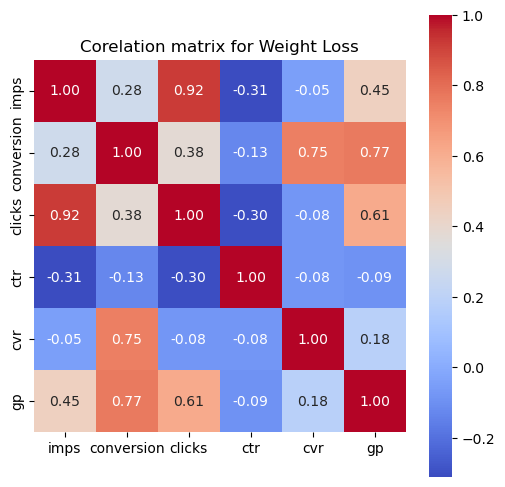

['emsculpt', 'skin tight', 'coolsculpting', 'emssculp neo', 'youthful trends', 'tirzepatide injections', 'ketone', 'garlic and tumeric pills', 'apple cider', 'plastic surgery', 'liquid lipo', 'lemon bottle', 'manhattan laser spa', 'male', 'neo', 'mommy make over', 'tickle lipo', 'ultrasound cavitation', 'ultrasonic fat reduction', 'ultrasonic cavitation', 'tru sculpt', 'tummy surgery', 'tens unit pelvic floor', 'zone 28', 'wood therapy', 'wright loss', 'wooden therapy', 'vela body shape', 'venus', 'velashape', 'vela shape iii', 'vela shape 3', 'vitamin', 'weightloss injections', 'weight watchers', 'weight loss pills', 'weight losa', 'salt therapy', 'sculptsure', 'red light therapy weight loss', 'red light th', 'stomach recuction', 'stomach', 'sugar factory', 'skin studio', 'chin lipo', 'cellulitis', 'cellulite reduction', 'cellulite', 'cavi lipo center', 'colon cleanse', 'deit', 'detox your body', 'detox body', 'detox', 'coolscupting', 'coolscuplt', 'coolsculpt', 'cool scuplting', 'coo

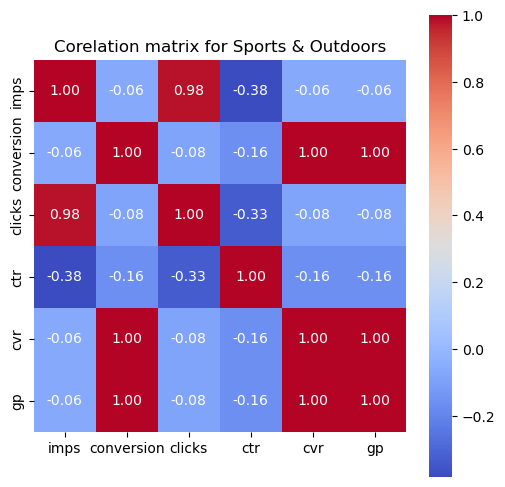

['bury the hatchet horsham', 'lone star axe', 'oaks park', 'things to do as a couple', 'snow tubing montage mountain', 'bury the hatchet', 'bury', 'blepharoplasty', 'break room', 'ax throwing', 'axe trowing', 'axe throwing nutley', 'axe throwing', 'axe thr', 'axe houston', 'axe', 'ismash', 'hawaii tours in hawaii', 'lasertron', 'jelly bean jungle']


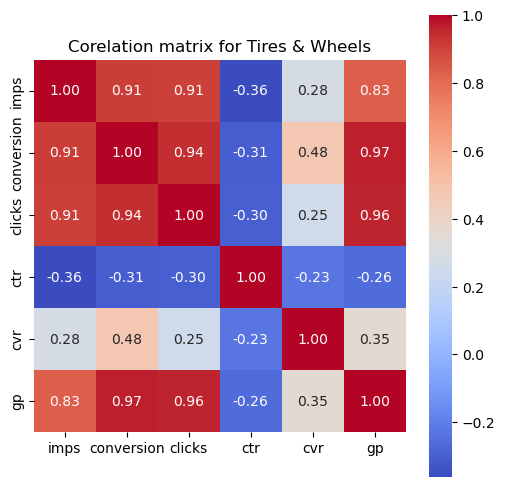

['wheel alignment', 'alignment', 'car alignment', 'tires', 'four wheel alignment', 'monroe', 'tire installation', 'tire balance', 'tire alignment', 'tire aligment', 'tire', 'wheel barring', 'wheel alighnment', 'wheel', 'rnr tire express st petersburg', 'skips', 'car wheel alignment', 'abas auto repair', '2 wheel alignment', '4 wheel alignment', 'aligntment', 'alignment in katy', 'alignent', 'aligment', 'balancing', 'fast tire']


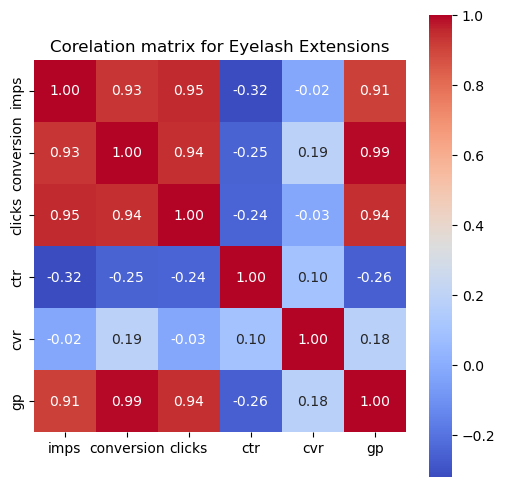

['lashes', 'eyelashes', 'eyelash extensions', 'eyelash extension', 'eyelash', 'lashful', 'lash', 'lash extensions', 'lash extension', 'eye lash', 'mink eyelashes', 'lorenco', 'new rose spa', 'mili lash', 'mink lashes', 'classic eyelash', 'damn esthetics', 'acrylic full set', '100 pcs lash extensions', 'bowlero commack', 'beauty studio nine', 'doll lash', 'hybrid lashes', 'kiss lashes', 'lashtastic', 'lashes extensions', 'lash remove extension', 'lash remove', 'lash lift tint', 'lash fill', 'lash externsions', 'lash extentions', 'lash extention', 'kash lift', 'eye lashes', 'eye lash extensions', 'eye lash extension', 'eye', 'ey', 'eyelashes extensions', 'eyelash training', 'eyelash fills', 'eyelash extention', 'eyelash course', 'eyelash  etension', 'eyelas', 'eyel', 'ellie lash']


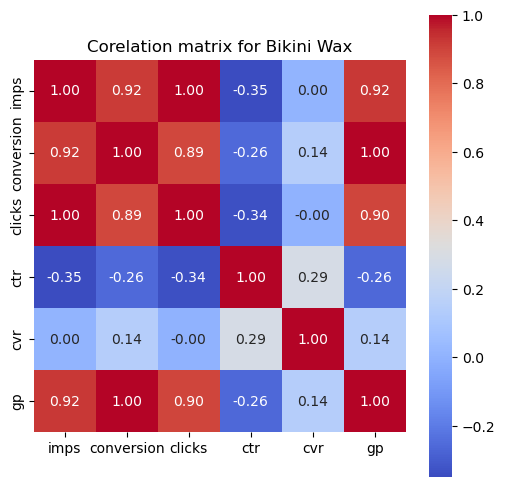

['brazilian wax', 'waxing', 'wax', 'brazilian', 'queens beauty parlor', 'bliss', 'male brazilian waxing', 'underarm', 'the wax den', 'v steam', 'vajacial', 'waxes', 'radiant waxing tampa', 'sugar wax', 'bleaching', 'brazilian bikini wax', 'braz', 'brazilian was', 'brazolian', 'brazillian wax', 'back wax', 'bikini waxing', 'bikini wax', 'eyebrow wax and tint']


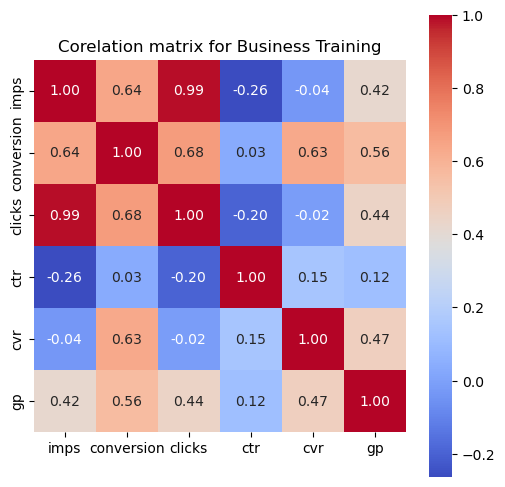

['relny', 'real estate', 'classes', 'cannabis', 'aceable', 'florida real estate 45 hour', 'azure tide', 'real estste', 'weed', 'online real estate', 'online real estate course', 'pistons game', 'property ans casualty', 'make up', 'marijuana growing', 'notary training', 'training', 'texas real estate', 'wine and painting', 'washington pre-licensing real-estate', 'real estate u', 'realestateu new york', 'realestateu', 'real states', 'real estateu', 'real estate online glass', 'real estate license course', 'real estate license', 'real estate exam', 'real estate course florida', 'real estate course', 'real estate classes', 'real  estate', 'real', 'stylist', 'ceshop real eastate', 'certificate small engine', 'business journal', 'business', 'amazon', 'aceable agent', 'beauty classes', 'bible course', 'insurance license', 'healthcare certified courses', 'hitt classes', 'law', 'eyelash classes', 'enhanced firearm training', 'gold cost school', 'group fitness instructing', 'forklift certificati

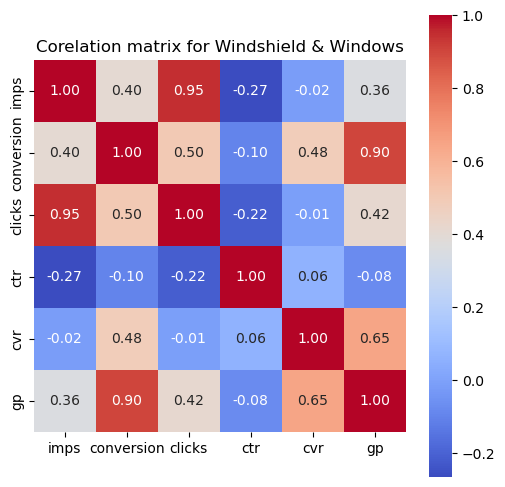

['window tinting', 'car guys chicago', 'tint', 'windshield chip repair', 'orange tints', 'massive mobile', 'mikes endow tint', 'mikes tint shop', 'mobile window tint', 'tints', 'tinting', 'tint world', 'tint windows', 'tinit window', 'timt', 'tesla window tint', 'windshield tint', 'windshield replacement', 'windshield repair', 'windshield chip', 'windshield', 'windsheild repair', 'windsh', 'windows tint', 'window tints', 'window tint for suv', 'window tint', 'window timt', 'window tent', 'window replacement', 'ceramic window tinting', 'ceramic window tint windshield', 'ceramic window tint', 'ceramic tint', 'bumper cars', 'car', 'car window tinting', 'car window tint', 'car window tent', 'car window glass', 'car tires', 'car tinting', 'car tint', 'auto window', 'auto glass', 'auto cooling system service', 'bonnie and clyde']


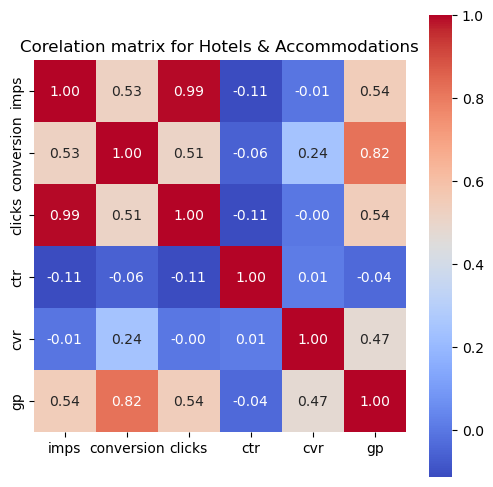

['bowling', 'sls miami', 'hotels', 'camelback', 'flamingo', 'vancouver hotel', 'hotel', 'napa', 'san diego zoo', 'garden of the gods lodge', 'catalina', 'bwi', 'mountain creek', 'seaworld', 'timber ridge', 'niagra falls', 'hilton garden inn chicago/oakbrook terrace', 'sea world', 'comedy', 'lehi', 'womens dove deordant', 'hershey', 'palm spring', 'omaha nevraska', 'ojai', 'omni spa', 'omni homestead', 'omni grove', 'palm springs', 'page', 'outer banks', 'ottawa hotels', 'orlando', 'poconos mountin', 'poconos', 'pigeon forge tn', 'pigeon forge', 'pico genesis', 'pittsburgh hotels', 'princeton', 'pool', 'portsmouth, nh', 'paso robles', 'park mgm', 'paris hotels', 'paris france', 'peppermill resort spa casino', 'pensacola fl', 'mazatlán', 'maya', 'mesa az', 'meritage', 'miami beach', 'miami', 'metropoint', 'loon', 'living desert', 'lgbt', 'mandalay bay shark', 'mandalay bay aquarium', 'mammoth', 'mall of america', 'marlborough', 'margaritaville', 'lowry park zoo', 'louisville ky', 'mackin

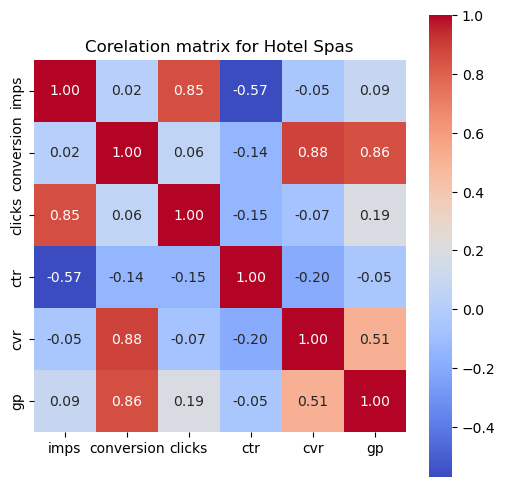

['carillon', 'naples grand spa', 'massage and spa', 'naples spa', 'whitbi spa', 'valley ho', 'scottsdale camelbach', 'sanctuary spa', 'red rock spa', 'spa orlando', 'standard spa miami', 'st. somewhere', 'cold plunge spa', 'couple resort day', 'couples massage resort', 'couples massage and facial', 'hotel spa', 'las vegas convention center south hall', 'facial hotel']


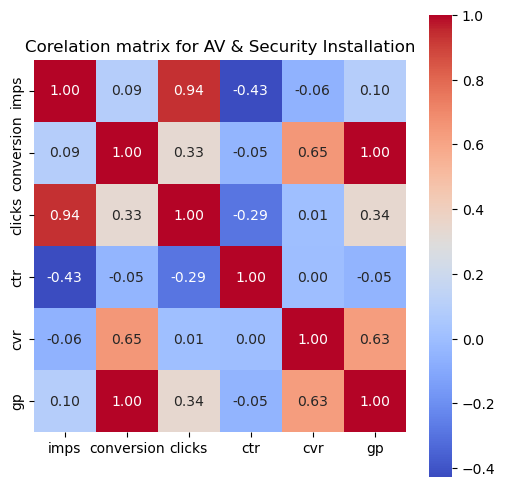

['remote car starter', 'car radio', 'tune-up', 're.ote start', 'remote starters', 'remote starter', 'remote start up', 'remote start installation', 'remote start', 'remote car start', 'car alarm', 'car starter package', 'car starter for manual', 'car starter', 'car remote starter', 'dashcam install', 'diamond exge', 'automatic car starter', 'automatic car start', 'auto start', 'auto car start', 'boomer']


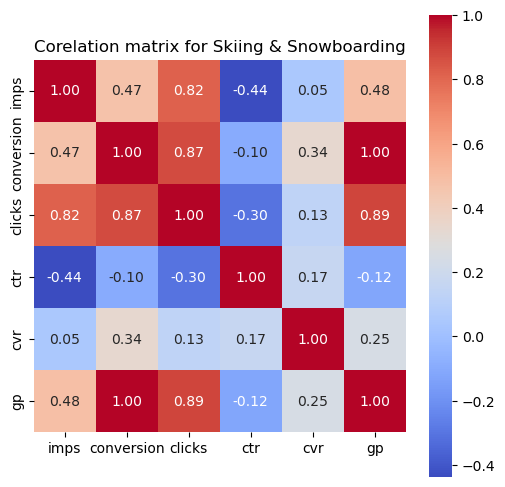

['big snow', 'snow tubing', 'mount peter lift ticket', 'pokono mountain snow sk', 'park city utah', 'lift ticket', 'mountaincreek', 'mountain creek snow tubing', 'mountain creek skiing nj', 'mountain creek ski', 'mount creek', 'tubing near me', 'tubing', 'snowboard lesson', 'snowboard', 'snow tubing pocono', 'snow tubing camelback', 'ski rentals', 'ski rental', 'camelback snow tubing', 'big bear snow summit', 'gore mountain']


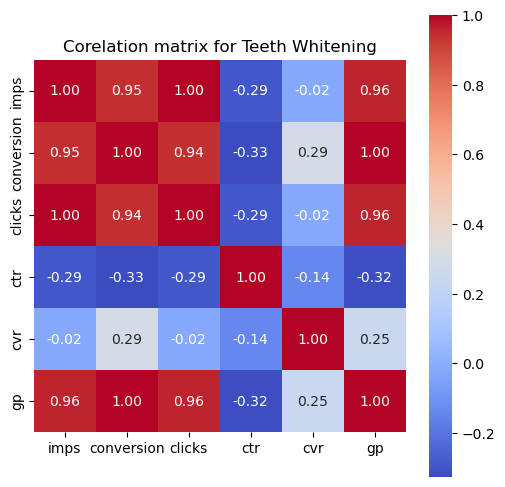

['teeth whitening', 'teeth whiten', 'teeth', 'teeyh whitening', 'teeth whiteninh', 'teeth cleaning and whitening', 'teeth bleaching', 'whitening', 'white', 'zoom teeth whitening', 'zoom teeth', 'smile institute', '75023 teeth whitening', 'bleach trays', 'bleach teeth', 'beaming white']


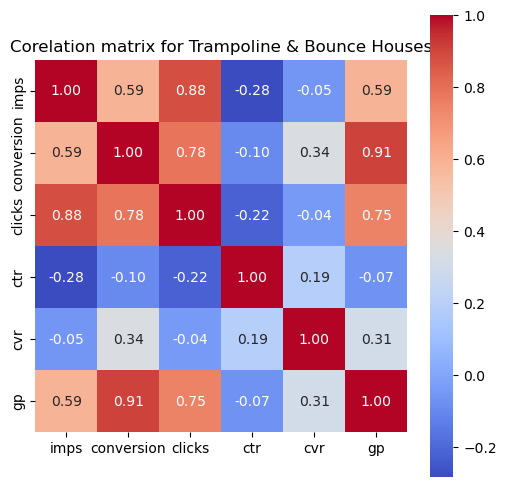

['sky zone', 'skyzone', 'kids blowdry', 'launch crossbay', 'get air', 'launch', 'rush', 'colosseum', 'trampoline park', 'uptown jungle', 'altitude', 'trampoline', 'just for fun', 'urbanair', 'jumping', 'phoenix rush fun park', 'sky zone shelby', 'smiley', 'irise', 'hang time', 'slick city', 'urban air oxford', 'tramp', 'indoor playground', 'flight adventure park', 'timonium sky zone', 'uptown junble', 'bounce bounce', 'ninja kidz', 'sky', 'lancaster', 'skyxone', 'phoenix ninja kidz', 'jump and play', 'off the wall', 'safari run', 'kangas', 'orchard park', 'play space', 'play place', 'port discovery', 'party places for kids', 'party kingdom', 'party birthday', 'mi combat', 'lego center', 'luv', 'my lil town', 'tram', 'trampolie', 'trampolin', 'trampolkne', 'trampoline playhouse', 'trampoline place', 'trampoline parks', 'toddler birthday', 'uptown juggle', 'uptown', 'up town jungle', 'surge trampoline', 'surge entertainment', 'teens activities', 'uptown jungle fun park', 'urban air brook

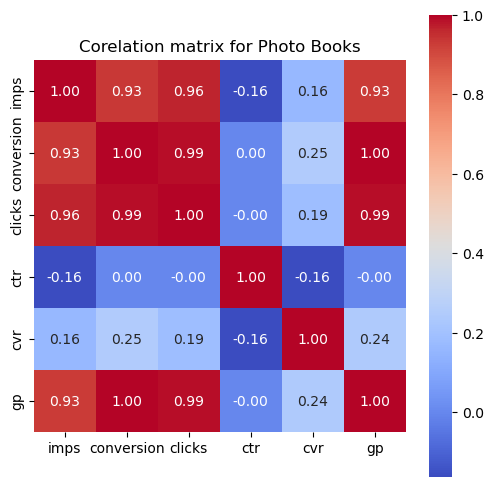

['shutterfly', 'photobooks', 'shutterfly book', 'hard cover photo book', 'photo book', 'shutter fly', 'printerpix', 'photo albums', 'photo books', 'photo books shutterfly', 'photobook', 'personalized book', 'shutterfly 12x12 photo albums', 'shutterfly canvas', 'shutterfly photo book', '8x10 shutterfly books', '20 page photobooks printerpix']


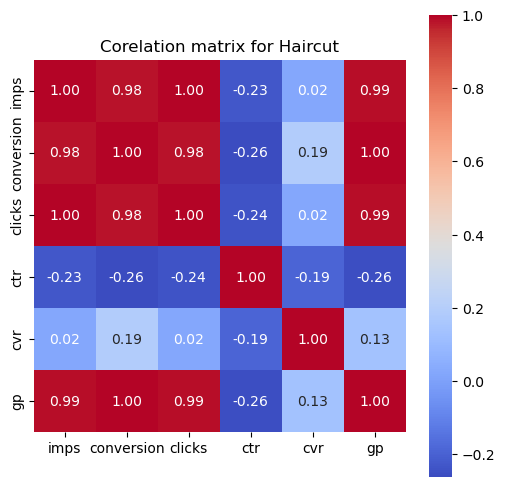

['haircut', 'haircut deep condition', 'haircuts', 'aveda institute', 'pixie cut', 'pivot point', 'patchogue', 'metro hair salon', 'lovely head salon', 'nv salon', 'moxie', 'women’s haircut', 'rosies beauty', 'roottouch up', 'saint marie haircut prices', 'single process', 'selvana hair salon', 'aura salon', 'blowdry', 'blow dry', 'bayalage', 'bella capelli', 'bellezza beauty salon', 'haircut womens', 'highlights haircut', 'highlight', 'jami cooke', 'hairsalon', 'hair cut woman', 'hair cut an color', 'hair cur', 'hair color streaks cur', 'hair perm', 'haircut and color', 'hair treatment', 'hair straight treatment', 'hair salon near lagrange illinois', 'hair salon and spa', 'hair root touch up', 'hair color and cut', 'hair blow out']


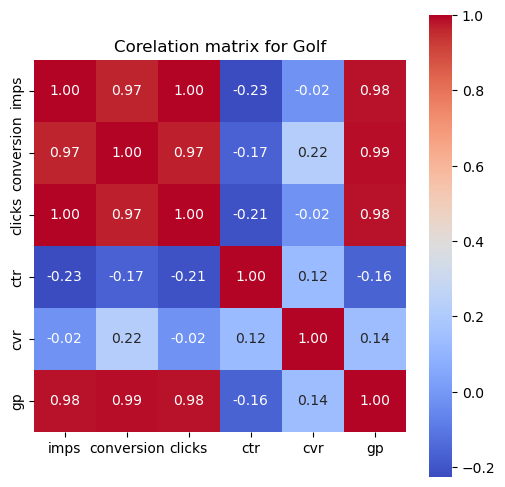

['golf', 'hackers', 'mini putt', 'gtr', 'mini golf', 'orlando stadium', 'pickle haus', 'memphis grizzlies', 'naples florida golf', 'miniature golfing', 'minigolf', 'monster golf san antonio', 'monster golf', 'tpc las vegas', 'tower tee', 'top golf', 'tee times', 'tee time', 'suncadia', 'sunridge', 'the ponds', 'x-golf', 'world of coca-cola', 'round 1', 'sawmill creek', 'putt shack', 'st. louis mo', 'shadow lake golf', 'bunker hill', 'cave creek', 'dining in winnipeg', 'adult fun', 'breaking benjamin', 'billiards', 'black light mini golf', 'indoor olayground', 'indoor mini golf', 'indoor golf', 'in door glow golf', 'hesperia', 'lakeville mn', 'kids golf lessons', 'golf palm springs', 'golf naples florida', 'golf lessons', 'golf in hudson fl rea', 'golf deals near hudson fl', 'golf course', 'golf range', 'golf sim', 'golf simulator', 'golfing', 'golf verrado']


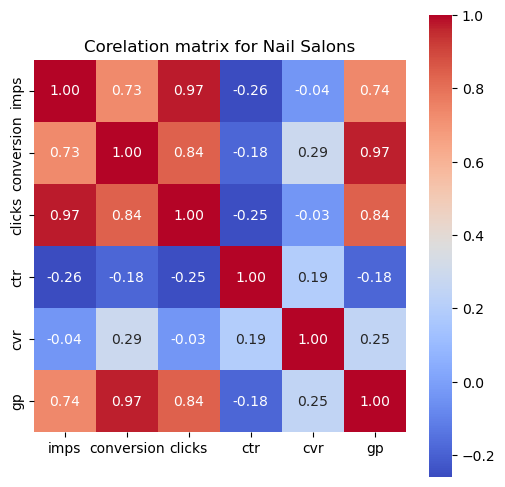

['nails', 'pedi', 'pedicure', 'mani pedi', 'nail', 'janine nails', 'pedi and manicure', 'gilmore', 'mani', 'no chip manicure', 'gel manicure', 'gel pedicure', 'pampers', 'professional gel nails', 'pediture', 'pedicures near me', 'pedicures', 'pedicure without nail polish', 'pedicure dallas', 'pedicure and manicure', 'pedicure 60645', 'pediccure', 'paraffin pedicure', 'pedícure', 'massage and pedicure', 'massa spa', 'medi and pedi', 'menicure', 'mani and pedi', 'mani pedi couple', 'manicure pedicure', 'manicure near 33618', 'manicure and pedicures', 'manicure and pedicure combination', 'manicure', 'mani/pedi', 'mani-pedi', 'mani pedis', 'nails gel', 'nails acylic', 'nailes', 'nail shop gift', 'nail salons', 'nail salon', 'nail manicure', 'nail extension', 'mini pedi', 'toes pedicure', 'waterless pedicure', 'vm beauty', 'russian pedicure', 'russian manicure and pedicure', 'russian manicure', 'spa pedicure', 'spa with mani pedi', 'shellac', 'cheap pedicure', 'cobb pedicure', 'dip nails', 

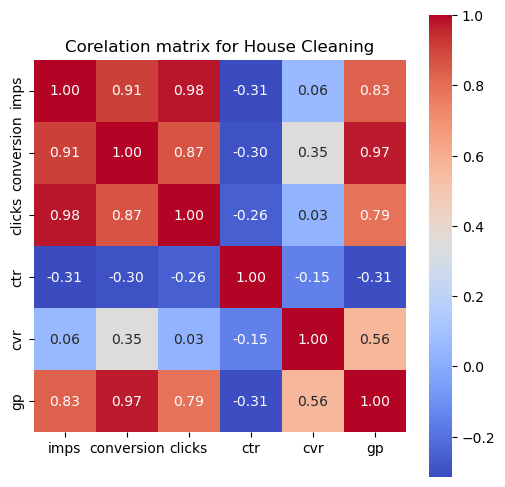

['cleaning', 'house cleaning', 'cleaner', 'medical grade home cleaning', 'maid', 'oc home cleaning', 'move out  cleaning', 'move out', 'cleaners', 'cleaning service', 'clean', 'deep clean', 'curtis e', 'danbury ct', 'apartment cleaning', 'house cleaning and organizing', 'house cleaners', 'house cleaner', 'house clean', 'house', 'home', 'home cleaning', 'furniture cleaning']


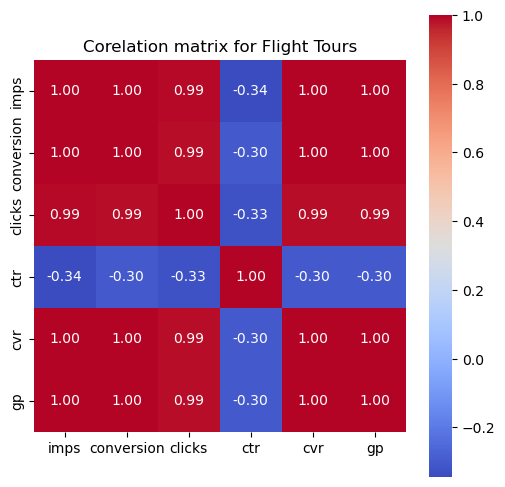

['helicopter', 'plane', 'nextgen', 'nyc helicopter', 'sunset flight', 'san francisco', 'shark viewing  tour', 'slide dallas', 'sky tours', 'chicago observation', 'airways', 'introductory flight', 'helicoptertour', 'helicopter tour for 2', 'helicopter tour', 'helicopter rides', 'helicopter ride', 'heli chicago', 'heli', 'heilcopter', 'hot air balloon ride', 'las vegas helicoptor', 'jeep tour', 'flight tour', 'flight school', 'flight lesson', 'flght lesson', 'fly chicago', 'go carts', 'fly for four', 'glider rides']


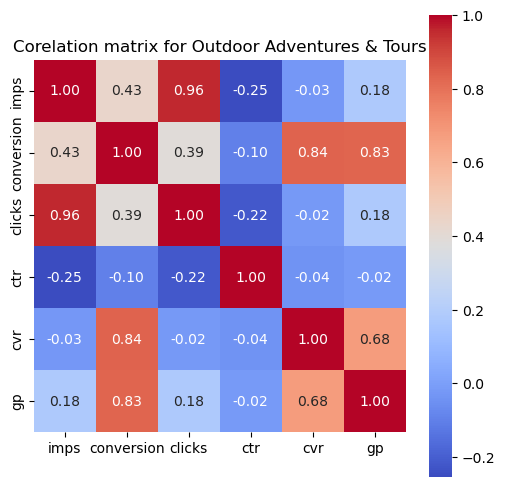

['hot air balloons', 'hot air balloon rides', 'atv', 'sedona jeep tours', 'offroad ocotillo', 'outdoor activities', 'plane ride', 'pink jeep tour', 'miami kids', 'off road', 'temecula hot air balloon', 'zip lining in vegas', 'utv', 'sand utv', 'sand hollow', 'race', 'sedona atv', 'steamboat springs', 'sphere', 'site tour', 'civil right museum', 'by brother', 'atv riding', 'atv night ride miami', 'atv night ride', 'atv las vegas', 'atv desert', 'atv riding group package', 'atv tour', 'atvs', 'atv vegas', 'arizona hot air balloon', '30min atv ride', 'adrenaline mountain', 'adrenaline atv tours', 'adventure', 'hot baloon', 'hot airballon', 'hot air baloon', 'hot air balloon', 'hot air ballon', 'hot air', 'las vegas atv tour', 'las vegas atv', 'kualoa ranch', 'jeep', 'florida keys', 'farm', 'extreame az utv', 'downtown st augustine', 'epic stargazing', 'guided atv tour', 'four people']


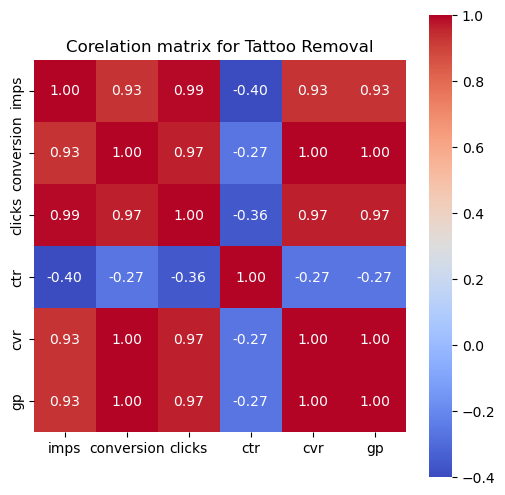

['tattoo removal', 'tattoo removable', 'tattoo', 'tatto removal lake forest', 'discover pico laser removal eyebrows tattoo', 'laser tattoo removal', 'laser tattoo', 'laser scar removal', 'eyebrow tattoo removal']


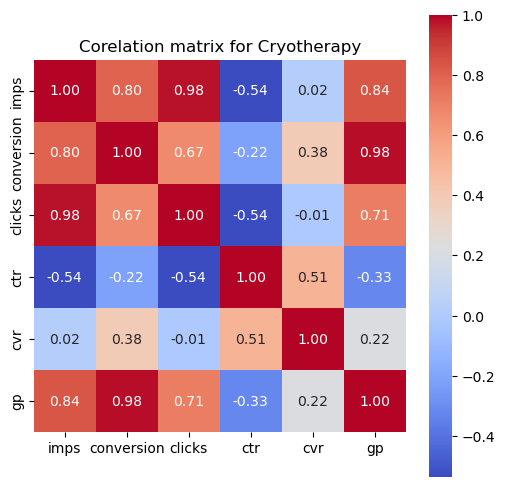

['cryotherapy', 'cryotherpy', 'neck fat', 'my body wellness', 'coolscuplting', 'crypotherapy', 'cryo facial', 'cryo', 'glo sun']


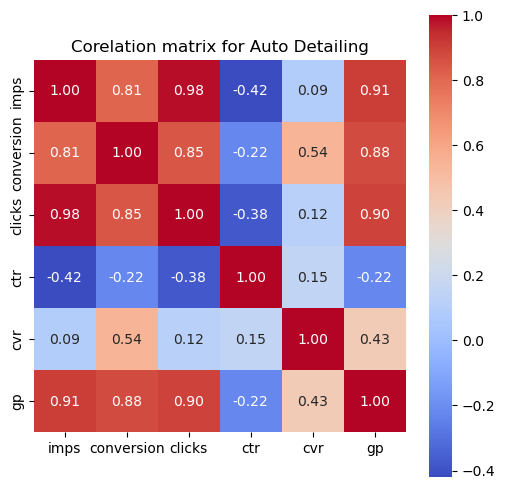

['car detailing', 'car detail', 'quiroga', 'auto detailing', 'paint pottery', 'nebo', 'oasis car waah', 'mobile car wash', 't-mobile', 'shampoo car seat', 'ceramic coating', 'ceramic wrap', 'bull riding', 'car cleaning', 'car coating', 'car clearning detailing', 'car interior detailing', 'car toys', 'car wash interior', 'car wash deels', 'details', 'detailing', 'detail', 'compact suv detail', 'auto show', 'auto detail', 'auto body painting', 'interior car cleaning', 'interior detail', "dynamic brother's detailing", 'full detail']


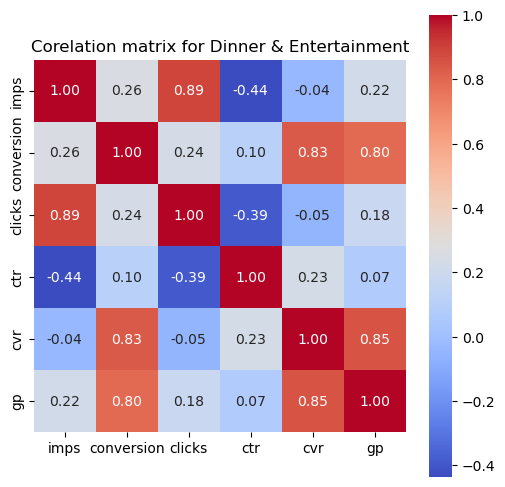

['flagship brunch san diego', 'dinner cruise', 'philadelphia cruise', 'adult entertainment', 'mauka warriors luau', 'live music', 'lu’au', 'naples florida', 'ocean voyage', 'midevil times dinner', 'murder mystery', 'sunset sailing', 'sunset sail', 'things to do sunday', 'victory cruise cape canaveral fl', 'valentine’s day dinner', 'valentines day dinner', "valentine's day dinners", 'volunteer princess', 'san francisco bay cruises', 'public history tour', 'restaurant week dinner cruise', 'sleuth mystery', 'ski lift tickets pa', 'chicago auto show', 'brunch cruise', 'casino cruise', 'day cruise miami', 'day cruise', 'dinner for two', 'dinner dectective', 'dinner boat', 'dinner', 'cru', 'cruise kids', 'cruise in', 'cruise dinner', 'alligator', '3 day cruise', 'booze cruise', 'boat celebreties', 'immersive gamebox', 'jodeci king theater', 'jungle queen dinner cruise', 'jungle queen', 'flamenco dinner show', 'firework', 'dolphin cruise', 'drag']


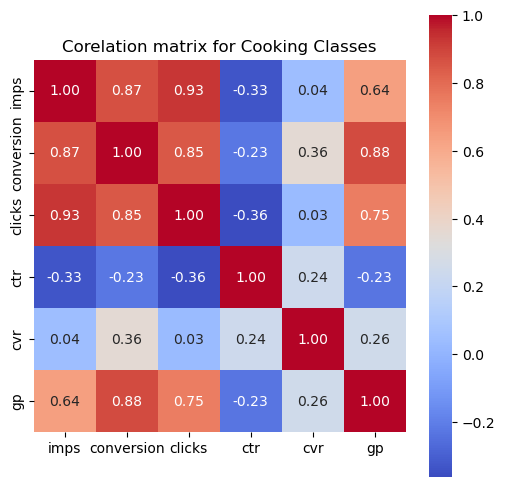

['class', 'cooking class', 'couples cooking class', 'cooking classes sc', 'cooking classes', 'pasta making class', 'pasta making', 'pasta class', 'pasta', 'sushi making class', 'sushi making', 'vegan cooking class', 'sauces', 'cocusocial', 'chocolate making class', 'cake makinh', 'cake decorating class', 'cake decorating', 'date night cooking class', 'cooking ckasses', 'cooking  class', 'cooking', 'couple cooking classes', 'couple cooking class', 'couple baking class', 'couples cooking classes nyc', 'couples cooking', 'couples class', 'baking class', 'baking', 'italian cooking classes', 'kura revolving sushi', 'kids baking', 'keto gift', 'flower arrangement class', 'group cooking', 'food class']


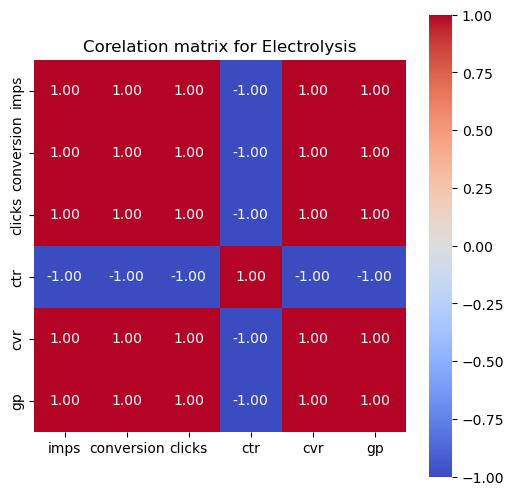

['electrolysis', 'ele']


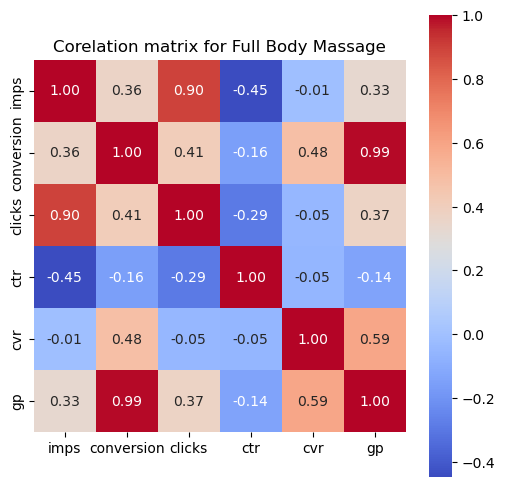

['massage heights', 'sante healing spa', 'joyaa spa', 'thai massge', 'professional body massage therapy', 'massage’s', 'massageluxe', 'massage, single person', 'massage and foot scrub', 'massage and detox', 'massage all days', 'massage men', 'massage marietta', 'massage heights spring cree', 'men’s full body massage', 'mesage', 'message 172nd broadway', 'mas', 'madsage', 'nani', 'naples florida 90 minute massage', 'northeast', 'mu tao massage', 'treat your feet', 'swedish couples massage', 'zen day spa', 'saku', 'royal vitality massage', 'santa fe couples massage', 'reflexology massage', 'soavia', 'spine and sports therapy massage', 'single massage', 'deep tissue massage pleasanton', 'aqua stone spa', '90 minutes massage', '90 min massage hendersom', 'accolades spa', '2 hour massage', '1 full body massage', 'body massage', 'beauty', 'himalayan sal', 'hand and stone', 'head and scalp massage', 'hair spa and shoulder massage', 'group massage', 'full body massages for 2', 'full body massa

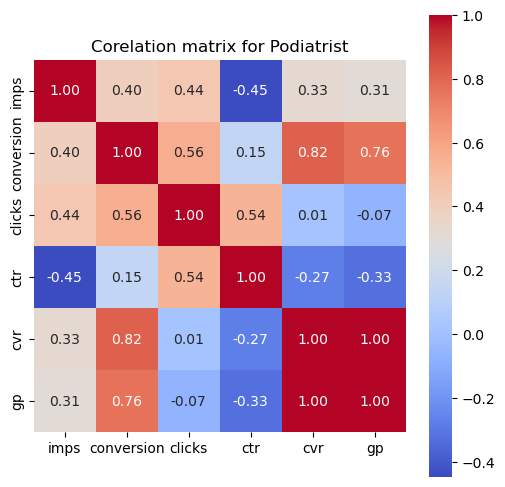

['laser nail', 'foot detox', 'medical pediacuer', 'nail fungus', 'toenail laser', 'rolling meadows', 'laser toenail']


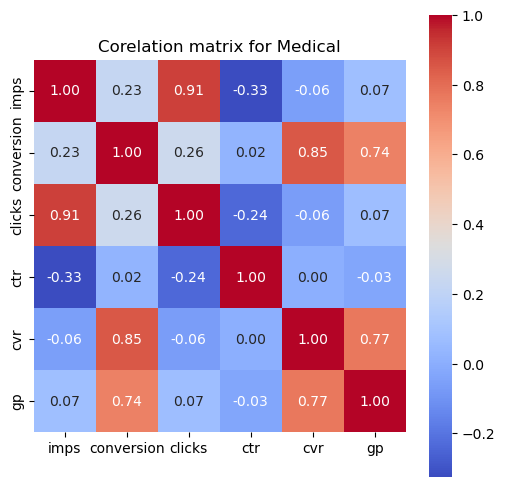

['laser toe', 'soft wave', 'gentle giant care', 'iv infusion', 'food sensitivities', 'lab', 'iv', 'allergy', 'advanced food and allergy', 'palm beach par three', 'pain management', 'pain', 'prime iv hydration', 'prime iv', 'medical pedicure', 'nad therapy', 'nad  iv', 'nad', 'nutrient testing', 'toenail fungus', 'toenail fungud', 'titr8', 'underarm sweat', 'ucari for dogs', 'therapy using muscle roller', 'vegas iv drip', 'vitamins', 'vitamin iv delray', 'vitamin energy iv drip at liquivida wellness center', 'vitamin d 3', 'vitamin d', 'root sharka', 'prp injections in houston for joints', 'restore sonterra', 'sofwave', 'soft wave therapy', 'shoulder therapy', 'shockwave therapy', 'dna testing', 'any lab test now', 'allergy panel', 'astra', 'asap iv', 'advanced labs', 'blood test', 'bac shot', 'biovital', 'beauty iv', 'i v drips', 'hyperbaric oxygen therapy', 'hydration treatment  iv', 'hydration vitamin  iv', 'hydration iv', 'ivf', 'iv therapy', 'iv teraphy', 'iv hydration', 'iv glutat

In [23]:
df = df_source[["imps", "conversion", "clicks", "gp", "cft_cat_name", "query"]].query("clicks > 0").groupby(["query"]).agg({
    "clicks" : "sum", "cft_cat_name" : "first", "conversion" : "sum", "imps" : "sum", "gp" : "sum", "query" : "first", "cft_cat_name" : "first"}
)[["imps", "conversion", "clicks", "gp", "cft_cat_name"]].reset_index().sort_values("gp", ascending = False)#.query("query == 'botox'").head(1)
df["ctr"] = df["clicks"] / df["imps"]
df["cvr"] = df["conversion"] / df["clicks"]

for name in df["cft_cat_name"].unique()[:50]:
    filtered_df = df[df['cft_cat_name'].str.contains(str(name), na=False)]

    d = pd.DataFrame(filtered_df)
    correlation_matrix = d[["imps", "conversion", "clicks", "ctr", "cvr", "gp"]].corr()
    queries = d["query"].unique().tolist()
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Corelation matrix for %s' % name)
    plt.show()
    print (queries)